In [157]:
import numpy as np 
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pylab as plt
warnings.filterwarnings('ignore')

In [158]:
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [159]:
df.drop('Id',axis=1 ,inplace=True)

In [160]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [161]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [163]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

DATA ANALYSIS

<Axes: >

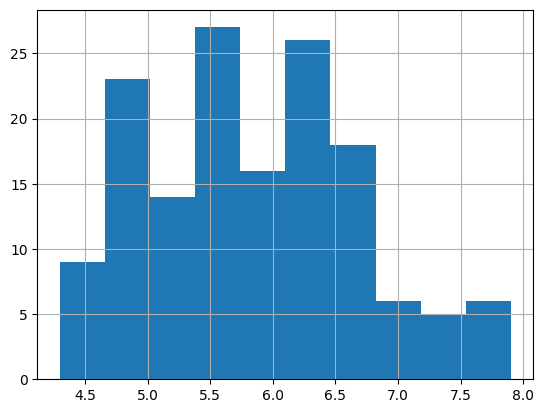

In [164]:
df['SepalLengthCm'].hist()

<Axes: >

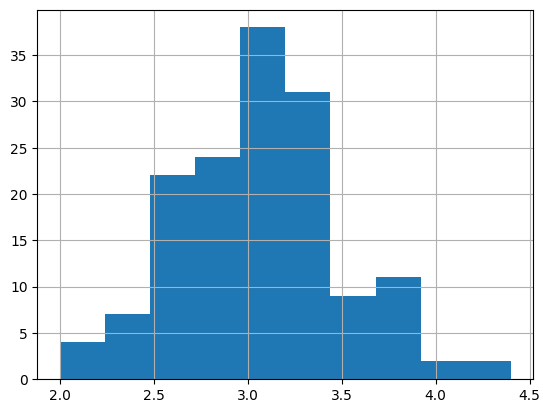

In [165]:
df['SepalWidthCm'].hist()

<Axes: >

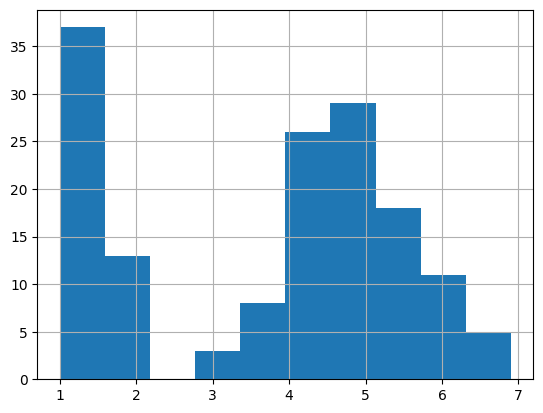

In [166]:
df['PetalLengthCm'].hist()

<Axes: >

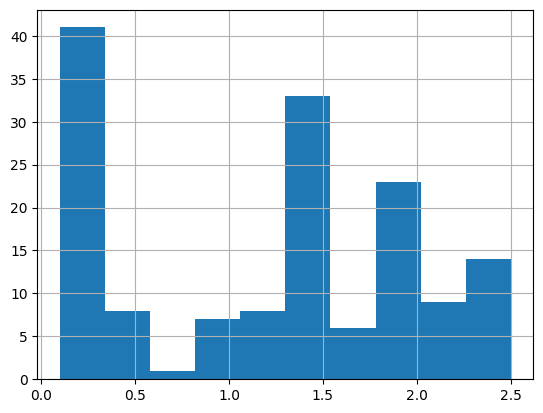

In [167]:
df['PetalWidthCm'].hist()

In [168]:
print(df['Species'].unique())  # Print unique values in the 'Species' column


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [169]:
colors = ['red','orange','green']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

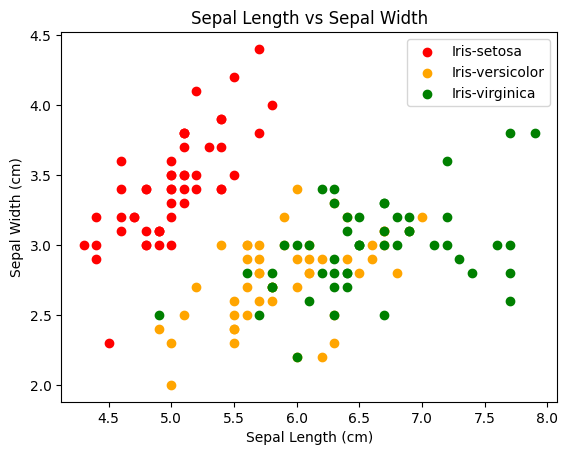

In [170]:
for i in range(3):
      x = df[df['Species'] == species[i]]
      if not x.empty:

       plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

      

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs Sepal Width")
plt.legend()
plt.show()

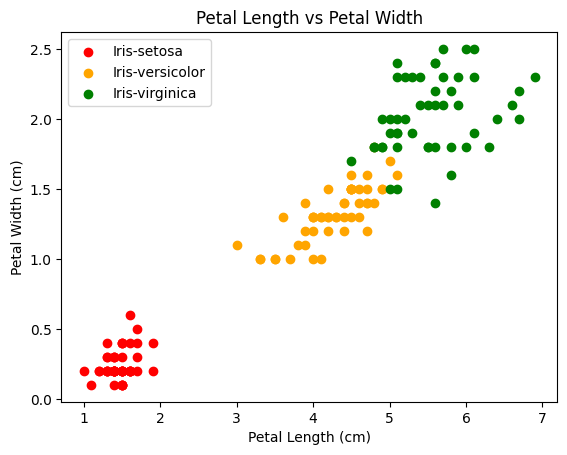

In [171]:
# plt.figure(figsize=(10, 6))  # Optional: Adjust figure size

for i in range(len(species)):
    x = df[df['Species'] == species[i]]

    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
    

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Length vs Petal Width")


plt.legend()
plt.show()

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [173]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [174]:
x =df.drop(columns=['Species'])
y = df[['Species']]

In [175]:
# Split in training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [176]:
x_train.shape ,x_test.shape

((105, 4), (45, 4))

In [178]:
Model = LogisticRegression()
Model.fit(x_train,y_train)
print("LogisticRegression Score :",Model.score(x_train,y_train) * 100)

LogisticRegression Score : 98.09523809523809


In [179]:
Model.fit(x_train.values,y_train.values)

LogisticRegression()

In [180]:
print("Score:" , Model.score(x_test,y_test)*100)

Score: 95.55555555555556


In [181]:
# USING K-NEAREST NEIGHBORS 
Model2 = KNeighborsClassifier()
Model2.fit(x_train.values , y_train.values)
print("K-Nearest-Neighbors Score:", Model2.score(x_test ,y_test)*100)

K-Nearest-Neighbors Score: 95.55555555555556


In [182]:
Model2.fit(x_train.values,y_train.values)

KNeighborsClassifier()

In [183]:
print("K-nearest-neighbors Score :",Model2.score(x_train.values,y_train.values) * 100)

K-nearest-neighbors Score : 98.09523809523809


In [184]:
# Saving models
import os,joblib
os.makedirs('models',exist_ok=True)

In [185]:
joblib.dump(Model,'./models/logisticRegression.lb')
joblib.dump(Model2,'./models/K-Nearest-Neighbors.lb')

print("MODELS ARE SUCCESSFULLY SAVED")

MODELS ARE SUCCESSFULLY SAVED
